# Testing CircuitQ: Charge offset

In [1]:
import circuitq as cq
import numpy as np
import networkx as nx
import scqubits as sc
import matplotlib.pyplot as plt

## Transmon
### CircuitQ
#### Circuit

In [2]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J');

#### Symbolic Hamiltonian

In [3]:
circuit = cq.CircuitQ(graph, offset_nodes=[1])
circuit.h_parameters

[C_{01}, E_{J010}, qo_{1}]

In [4]:
circuit.h

-E_{J010}*cos(3.03853489761902e+15*\Phi_{1}) + 0.5*(q_{1} + qo_{1})**2/C_{01}

#### Diagonalization data

In [5]:
EJ = 10*circuit.c_v["E_C"]
EC = circuit.c_v["E_C"]

q_off_list = np.linspace(-2*2*circuit.e,2*2*circuit.e,30)
cq_eigv_list = []
for q_off in q_off_list:
    parameters_list = [False, EJ, q_off]
    h_num = circuit.get_numerical_hamiltonian(200,grid_length=np.pi/2*circuit.phi_0, parameter_values=parameters_list)
    eigv, eigs = circuit.get_eigensystem(n_eig=10)
    cq_eigv_list.append(eigv[:10])

### SCQubit

In [6]:
transmon = sc.Transmon(EJ=EJ, EC=EC, ng=0,ncut=100)
spectrum = transmon.get_spectrum_vs_paramvals('ng', (q_off_list/(2*circuit.e)), evals_count=10);

### Compare

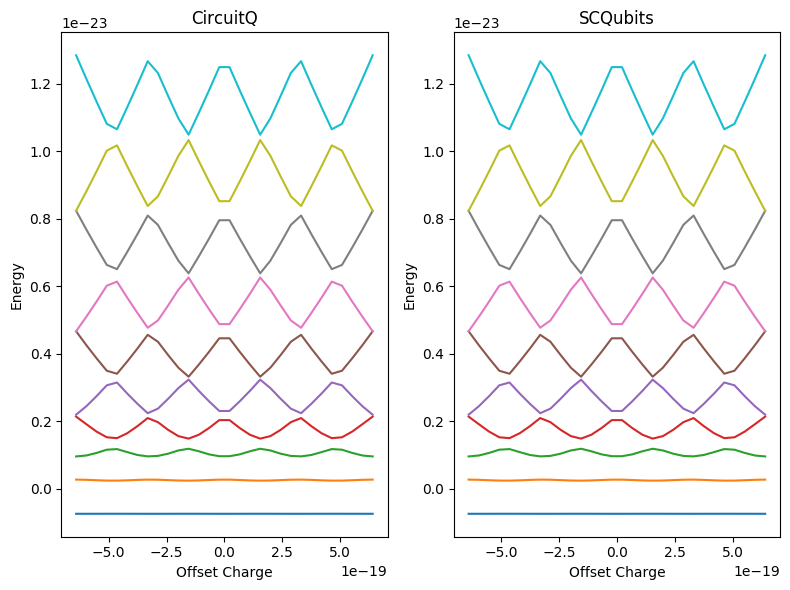

In [7]:
plt.style.use('default')
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title("CircuitQ")
plt.plot(q_off_list, cq_eigv_list)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"Offset Charge")
plt.ylabel("Energy")
plt.subplot(122)
plt.title("SCQubits")
plt.plot(q_off_list, spectrum.energy_table)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"Offset Charge")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

## With degeneracy 

In [8]:
grid_length = np.pi*circuit.phi_0
nbr_energies = 20
cq_eigv_list = []
for q_off in q_off_list:
    parameters_list = [False, EJ, q_off]
    h_num = circuit.get_numerical_hamiltonian(200,grid_length=grid_length, parameter_values=parameters_list)
    eigv, eigs = circuit.get_eigensystem(n_eig=nbr_energies)
    cq_eigv_list.append(eigv[:nbr_energies])
cq_eigv_no_off_list = []
for q_off in q_off_list:
    parameters_list = [False, EJ, False]
    h_num = circuit.get_numerical_hamiltonian(200,grid_length=grid_length, parameter_values=parameters_list)
    eigv, eigs = circuit.get_eigensystem(n_eig=nbr_energies)
    cq_eigv_no_off_list.append(eigv[:nbr_energies])

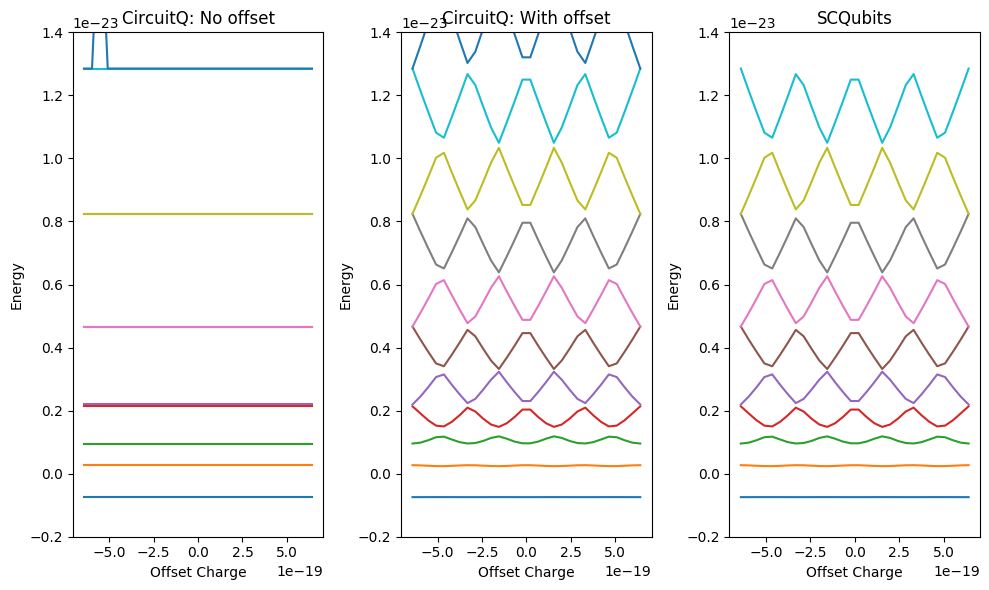

In [9]:
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title("CircuitQ: No offset")
plt.plot(q_off_list, cq_eigv_no_off_list)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"Offset Charge")
plt.ylabel("Energy")
plt.ylim(-0.2e-23,1.4e-23)

plt.subplot(132)
plt.title("CircuitQ: With offset")
plt.plot(q_off_list, cq_eigv_list)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"Offset Charge")
plt.ylabel("Energy")
plt.ylim(-0.2e-23,1.4e-23)

plt.subplot(133)
plt.title("SCQubits")
plt.plot(q_off_list, spectrum.energy_table)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"Offset Charge")
plt.ylabel("Energy")
plt.ylim(-0.2e-23,1.4e-23)

plt.tight_layout()
plt.show()

The degeneracy is lifted when choosing a larger grid